# Препроцессинг данных перед передачей в модель

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display
import torch
import seaborn as sns
import csv
from monai.data.meta_tensor import MetaTensor

from utils.tensors_analysis import CTTensorQualityAssessment
from utils.visualize_ct_tensor import compare_volumes
from model.utils.train_test_split import split_dataset

## Представление dicom в виде тензора 

In [27]:
!python scripts/prepare_ct_tensors.py --input '../data/processed/train' --output 'data/train/tensors'

2025-09-23 12:22:08,381 - INFO - Found 6 patient folders in ../data/processed/train
Processing patients: 100%|████████████████████████| 6/6 [00:34<00:00,  5.72s/it]
2025-09-23 12:22:45,026 - INFO - 
2025-09-23 12:22:45,028 - INFO - PROCESSING SUMMARY:
2025-09-23 12:22:45,028 - INFO - Total patients: 6
2025-09-23 12:22:45,028 - INFO - Successful: 6
2025-09-23 12:22:45,028 - INFO - Failed: 0
2025-09-23 12:22:45,028 - INFO - Errors log saved to: data/train/tensors/processing_errors.json
2025-09-23 12:22:45,028 - INFO - Output files saved to: data/train/tensors
2025-09-23 12:22:45,028 - INFO - Log file: processing.log
2025-09-23 12:22:45,028 - INFO - ==================================================
2025-09-23 12:22:45,028 - INFO - ✅ Done!


In [21]:
# Данные для записи в CSV
labels = [
    ['filename', 'label'],
    ['01.pt', '0'],
    ['02.pt', '0'],
    ['03.pt', '0'],
    ['04.pt', '1'],
    ['05.pt', '1'],
    ['06.pt', '1'],
]

# Создание и запись в CSV файл
with open('data/train/labels.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerows(labels)

print("CSV файл успешно создан: labels.csv")

CSV файл успешно создан: labels.csv


## Визуализация

In [188]:
assessor = CTTensorQualityAssessment()

# Укажите путь к вашему файлу
tensor_path = "data/train/tensors/03.pt"  # Замените на реальный путь

tensor = assessor.load_tensor_from_file(
    tensor_path, 
    target_shape=(1,1, 128, 128, 128)
)

quality_report = assessor.assess_tensor_quality(tensor, "my_scan")

2025-09-23 16:30:16,812 - INFO - === Оценка качества нормализованного тензора: my_scan ===
2025-09-23 16:30:16,836 - INFO - Форма тензора: torch.Size([1, 1, 128, 128, 128]) ✓
2025-09-23 16:30:16,836 - INFO - Тип данных: torch.float32 ✓
2025-09-23 16:30:16,837 - INFO - Устройство: cpu
2025-09-23 16:30:16,837 - INFO - Размер в памяти: 8.00 МБ
2025-09-23 16:30:16,838 - INFO - NaN значения: Нет ✓
2025-09-23 16:30:16,838 - INFO - Inf значения: Нет ✓


Загрузка тензора из: data/train/tensors/03.pt
Загружен тензор формы: torch.Size([1, 1, 128, 128, 128])


2025-09-23 16:30:17,269 - INFO - Статистический анализ:
2025-09-23 16:30:17,269 - INFO - Mean=0.1768, Std=0.2330, Min=0.0000, Max=1.0000
2025-09-23 16:30:17,312 - INFO - Анализ артефактов:
2025-09-23 16:30:17,314 - INFO - Константные срезы: 20.3%
2025-09-23 16:30:17,315 - INFO - Выбросы: 0.0%
2025-09-23 16:30:17,316 - INFO - Плавные переходы: ✓
2025-09-23 16:30:17,323 - INFO - Пространственный анализ:
2025-09-23 16:30:17,324 - INFO - Центр: 0.4269, Углы: 0.0356
2025-09-23 16:30:17,325 - INFO - Контраст: 0.3913
2025-09-23 16:30:17,329 - INFO - Готовность для MedicalNet:
2025-09-23 16:30:17,330 - INFO - Правильная форма: ✓
2025-09-23 16:30:17,331 - INFO - Размер batch: ✓
2025-09-23 16:30:17,331 - INFO - Пространственные размеры: ✓
2025-09-23 16:30:17,331 - INFO - Минимальный размер: ✓
2025-09-23 16:30:17,333 - INFO - Вероятно нормализован: ✓
2025-09-23 16:30:17,334 - INFO - ==================================================
2025-09-23 16:30:17,334 - INFO - ИТОГОВЫЙ ОТЧЕТ О КАЧЕСТВЕ
2025-

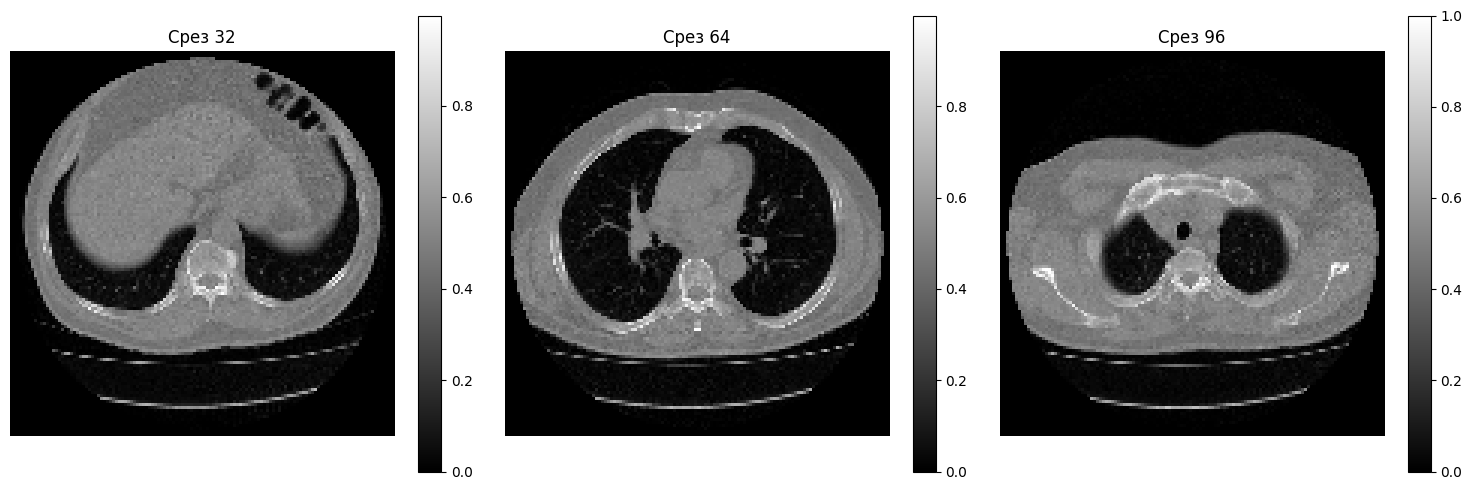

In [189]:
assessor.visualize_tensor(tensor)

In [191]:
!python utils/tensors_analysis.py --input data/train/tensors --num-workers 8 --visualize


2025-09-23 16:31:13,406 - INFO - Найдено 6 файлов для загрузки
Загрузка тензоров: 100%|██████████████████████████| 6/6 [00:07<00:00,  1.21s/it]
2025-09-23 16:31:27,735 - INFO - Успешно загружено 6 тензоров
Оценка качества тензоров:   0%|                           | 0/6 [00:00<?, ?it/s]2025-09-23 16:31:27,739 - INFO - === Оценка качества нормализованного тензора: 03 ===
2025-09-23 16:31:27,756 - INFO - Форма тензора: torch.Size([1, 1, 128, 128, 128]) ✓
2025-09-23 16:31:27,756 - INFO - Тип данных: torch.float32 ✓
2025-09-23 16:31:27,756 - INFO - Устройство: cpu
2025-09-23 16:31:27,756 - INFO - Размер в памяти: 8.00 МБ
2025-09-23 16:31:27,756 - INFO - NaN значения: Нет ✓
2025-09-23 16:31:27,756 - INFO - Inf значения: Нет ✓
2025-09-23 16:31:28,129 - INFO - Статистический анализ:
2025-09-23 16:31:28,129 - INFO - Mean=0.1768, Std=0.2330, Min=0.0000, Max=1.0000
2025-09-23 16:31:28,147 - INFO - Анализ артефактов:
2025-09-23 16:31:28,147 - INFO - Константные срезы: 20.3%
2025-09-23 16:31:28,147

Original shape: (344, 512, 512)
Processed shape: (128, 128, 128)


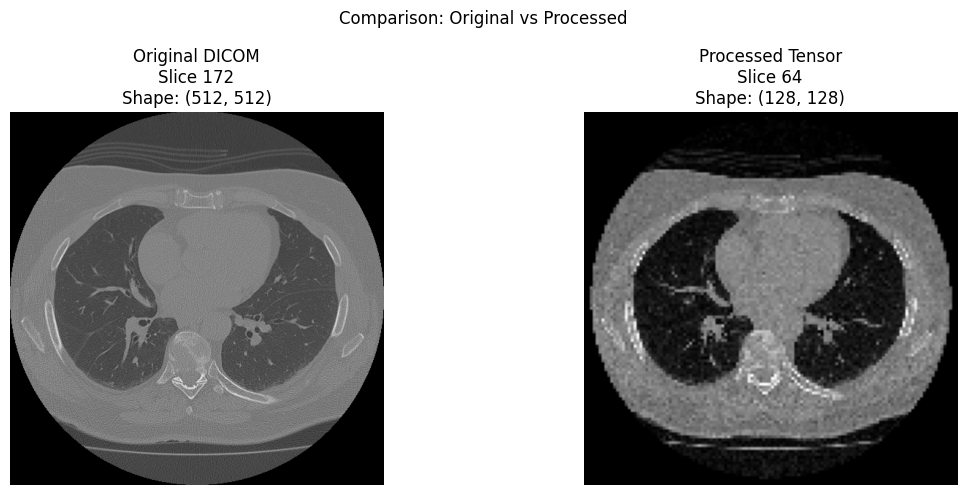

In [5]:
compare_volumes("../data/processed/train/04", "data/train/tensors/04.pt")

# Разделение на трейн и тест

In [2]:
split_dataset()

Dataset split completed!
Train samples: 4
Test samples: 2
Train class distribution:
label
0    2
1    2
Name: count, dtype: int64
Test class distribution:
label
0    1
1    1
Name: count, dtype: int64


(  filename  label
 1    02.pt      0
 5    06.pt      1
 0    01.pt      0
 4    05.pt      1,
   filename  label
 3    04.pt      1
 2    03.pt      0)

In [193]:
!python MedicalNet/main.py \
    model=resnet \
    model_depth=10 \
    input_W=160 \
    input_H=160 \
    input_D=128 \
    batch_size=2 \
    learning_rate=0.0001 \
    n_epochs=50 \
    data_root="data/train/tensors" \
    img_list="data/train/labels.csv" \
    no_cuda=true

loading pretrained model MedicalNet/pretrain/resnet_18.pth
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/pytorch_lightning/trainer/configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.

  | Name      | Type               | Params | Mode 
---------------------------------------------------------
0 | model     | ResNet             | 14.4 M | train
1 | criterion | CrossEntropyLoss   | 0      | train
2 | accuracy  | MulticlassAccuracy | 0      | train
---------------------------------------------------------
14.4 M    Trainable params
0         Non-trainable params
14.4 M    Total params
57.602    Total estimated model params size (MB)


# Создание датасета

In [132]:
df = pd.read_csv('/Volumes/Storage/data_sets/hackathon2025/CT_LUNGCANCER_500/pathology_results.csv')

In [134]:
pd.set_option('display.max_colwidth', None)
df.loc[df['patology']==0].head()

,id,patology,doctor_1_comment,doctor_2_comment,doctor_3_comment,doctor_4_comment,doctor_5_comment,doctor_6_comment,window_center,window_width,x,y,z
11,RLAD42D007-25020_RLSD42D007-25020,0,"очагов нет, номер совпадает",Нет очагов,Нет очагов,"рваная серия, всго 61 скан",Достоверно очагов нет,Нет очагов,40.0,400.0,0.702,0.702,1
21,RLADD02000001600_RLSDD02000001584,0,Нет очагов,очагов нет,нет очагов,"Нет очагов, участки линейного фиброза",Нет очагов,"единичные очаги до 4 мм, линейный пневмофиброз",-550.0,1600.0,0.763,0.763,1
22,RLADD02000006139_RLSDD02000006122,0,Нет очагов,очагов нет,"интерст.из.,немног.о.<2 мм в НД, СД R",Нет очагов,"Нет очагов, бронхопневмония в НД справа",Нет очагов,40.0,400.0,0.781,0.781,1
23,RLADD02000008903_RLSDD02000008892,0,очагов нет,Нет очагов,очагов более 4мм не определяется,очагов нет,нет очагов,Достоверно очагов нет,-550.0,1600.0,0.724,0.724,1
24,RLADD02000017695_RLSDD02000017543,0,очагов нет,Достоверно очагов нет,Нет очагов,очагов нет,ед.о. <2 мм,очагов более 4мм не определяется,-550.0,1600.0,0.782,0.782,1


In [136]:
df.loc[df['patology']==0].describe()

,patology,window_center,window_width,x,y,z
count,72.0,72.000000,72.000000,72.000000,72.000000,72.0
mean,0.0,-80.833333,645.833333,0.725125,0.725125,1.0
std,0.0,237.378583,482.930462,0.098375,0.098375,0.0
min,0.0,-550.000000,400.000000,0.518000,0.518000,1.0
25%,0.0,40.000000,400.000000,0.674000,0.674000,1.0
50%,0.0,40.000000,400.000000,0.719000,0.719000,1.0
75%,0.0,40.000000,400.000000,0.782000,0.782000,1.0
max,0.0,40.000000,1600.000000,1.003000,1.003000,1.0


In [138]:
patology = df.loc[df['patology']==0]
patology

,id,patology,doctor_1_comment,doctor_2_comment,doctor_3_comment,doctor_4_comment,doctor_5_comment,doctor_6_comment,window_center,window_width,x,y,z
11,RLAD42D007-25020_RLSD42D007-25020,0,"очагов нет, номер совпадает",Нет очагов,Нет очагов,"рваная серия, всго 61 скан",Достоверно очагов нет,Нет очагов,40.0,400.0,0.702,0.702,1
21,RLADD02000001600_RLSDD02000001584,0,Нет очагов,очагов нет,нет очагов,"Нет очагов, участки линейного фиброза",Нет очагов,"единичные очаги до 4 мм, линейный пневмофиброз",-550.0,1600.0,0.763,0.763,1
22,RLADD02000006139_RLSDD02000006122,0,Нет очагов,очагов нет,"интерст.из.,немног.о.<2 мм в НД, СД R",Нет очагов,"Нет очагов, бронхопневмония в НД справа",Нет очагов,40.0,400.0,0.781,0.781,1
23,RLADD02000008903_RLSDD02000008892,0,очагов нет,Нет очагов,очагов более 4мм не определяется,очагов нет,нет очагов,Достоверно очагов нет,-550.0,1600.0,0.724,0.724,1
24,RLADD02000017695_RLSDD02000017543,0,очагов нет,Достоверно очагов нет,Нет очагов,очагов нет,ед.о. <2 мм,очагов более 4мм не определяется,-550.0,1600.0,0.782,0.782,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,RLADD02000204041_RLSDD02000203989,0,очагов больше 20,более 20 очагов,множественные очаги,более 20 очагов,более 20 очагов,очаги более 20 шт,40.0,400.0,0.686,0.686,1
495,RLADD02000212384_RLSDD02000304744,0,"очагов нет, одно легкое","Левый гемиторакс заполнен жидкостным содержимым, состояние после пульмонэктомии","Нет очагов, левосторонняя пульмонэктомия",Нет очагов,Нет очагов,"Нет очагов, левосторонняя пульмонэктомия",40.0,400.0,0.782,0.782,1
497,RLADD02000214342_RLSDD02000306560,0,Нет очагов,rad AG 00000000205450 ед.о.< 4 мм,Нет очагов,Нет очагов,Достоверно очагов нет,"Нет очагов, центральный рак правого легкого, радиационный пневмонит?, эмфизема",40.0,400.0,0.650,0.650,1
503,RLADD02000216832_RLSDD02000308127,0,нет очагов,Нет очагов,Нет очагов,Нет очагов,Достоверно очагов нет,Нет очагов,40.0,400.0,0.735,0.735,1


In [140]:
patology = patology.drop([28, 32, 34, 166, 172, 218, 242, 259, 276, 291, 373, 379, 394, 503, 522])

In [175]:
patology = patology.drop(397)

In [174]:
patology.head(70)

,id,patology,doctor_1_comment,doctor_2_comment,doctor_3_comment,doctor_4_comment,doctor_5_comment,doctor_6_comment,window_center,window_width,x,y,z
21,RLADD02000001600_RLSDD02000001584,0,Нет очагов,очагов нет,нет очагов,"Нет очагов, участки линейного фиброза",Нет очагов,"единичные очаги до 4 мм, линейный пневмофиброз",-550.0,1600.0,0.763,0.763,1
22,RLADD02000006139_RLSDD02000006122,0,Нет очагов,очагов нет,"интерст.из.,немног.о.<2 мм в НД, СД R",Нет очагов,"Нет очагов, бронхопневмония в НД справа",Нет очагов,40.0,400.0,0.781,0.781,1
26,RLADD02000022008_RLSDD02000020189,0,Достоверно очагов нет,"Нет очагов, спайки справа",Нет очагов,-,-,-,40.0,400.0,0.561,0.561,1
27,RLADD02000022405_RLSDD02000022386,0,"очагов нет, есть матовое стекло с обеих сторон",Нет очагов,"Нет очагов, гиперчувствительный пневмонит",-,-,-,40.0,400.0,0.518,0.518,1
29,RLADD02000023198_RLSDD02000023166,0,"очагов нет, есть бронхоэктазы","Нет очагов, БЭ, в том числе и заполненные, в НД левого легкого",Нет очагов,-,-,-,40.0,400.0,0.665,0.665,1
35,RLADD02000024812_RLSDD02000024862,0,"гипостатические изменения, очагов нет",нет очагов,Нет очагов,-,-,-,40.0,400.0,0.785,0.785,1
37,RLADD02000025845_RLSDD02000025715,0,Больше 20 очагов,более 20 очагов,Больше 20 очагов,-,-,-,40.0,400.0,0.610,0.610,1
38,RLADD02000026446_RLSDD02000026312,0,Множественные очаги (более 20) с тенденцией к слиянию,Нет очагов,Нет очагов интерстициальное заболевание легких,-,-,-,40.0,400.0,0.586,0.586,1
39,RLADD02000026625_RLSDD02000026580,0,"Нет очагов, утолщение междолевой плевры и затеки жидкости по ней",Нет очагов,Нет очагов,-,-,-,40.0,400.0,0.619,0.619,1
151,RLADD02000044548_RLSDD02000044488,0,Нет очагов,"недост.вдох. , релак. прав. диафр. ед.о.<4 мм",Нет очагов,"Нет очагов, высокое положение правого купола диафрагмы, компрессионные изменения базальных отделов правого легкого",очагов нет,Нет очагов,40.0,400.0,0.686,0.686,1


In [176]:
patology.shape

(33, 13)

In [179]:
patology[['id','patology']]

,id,patology
21,RLADD02000001600_RLSDD02000001584,1
22,RLADD02000006139_RLSDD02000006122,1
26,RLADD02000022008_RLSDD02000020189,1
27,RLADD02000022405_RLSDD02000022386,1
29,RLADD02000023198_RLSDD02000023166,1
35,RLADD02000024812_RLSDD02000024862,1
37,RLADD02000025845_RLSDD02000025715,1
38,RLADD02000026446_RLSDD02000026312,1
39,RLADD02000026625_RLSDD02000026580,1
151,RLADD02000044548_RLSDD02000044488,1


In [178]:
patology['patology'] = 1

In [180]:
patology = patology[['id','patology']]
patology.to_csv('../data/external/patology_CT_LUNGCANCER_500.csv', index=False)

In [ ]:
/Volumes/Storage/data_sets/hackathon2025/MosMedData-CT-COVID19-type I-v 3/dataset_registry.xlsx